In [196]:
import pandas as pd

# Load Dataset
data = pd.read_csv("data_split/processed_data.csv")
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [22]:
data.isnull().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [197]:
from sklearn.preprocessing import OrdinalEncoder

# Define order of categories for AQI_Bucket
categories_order = [['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']]

# Create encoder object
ordinal_encoder = OrdinalEncoder(categories=categories_order)

# Reshape target variable to fit the encoder's expected format
y_reshaped = data['AQI_Bucket'].values.reshape(-1, 1)

# Apply encoder to the target variable
data['Encoded_AQI_Bucket'] = ordinal_encoder.fit_transform(y_reshaped)

# Use 'Encoded_AQI_Bucket' as target variable
y = data['Encoded_AQI_Bucket']

# Drop AQI_Bucket
data = data.drop(columns=['AQI_Bucket'])

In [198]:
#print distinct values of Encoded_AQI_Bucket
data['Encoded_AQI_Bucket'].unique()

array([3., 4., 5., 2., 1., 0.])

In [199]:
from sklearn.preprocessing import OrdinalEncoder

# Define order of categories for AQI_Bucket
categories_order = [['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam']]

# Create encoder object
ordinal_encoder = OrdinalEncoder(categories=categories_order)

# Reshape target variable to fit the encoder's expected format
y_reshaped = data['City'].values.reshape(-1, 1)

# Apply encoder to the target variable
data['Encoded_City'] = ordinal_encoder.fit_transform(y_reshaped)

# Use 'Encoded_AQI_Bucket' as target variable
y = data['Encoded_City']

# Drop AQI_Bucket
data = data.drop(columns=['City'])

In [6]:
data

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Encoded_AQI_Bucket,Encoded_City
0,2015-01-29,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02000,0.000000,3.140000,209.0,3.0,0.0
1,2015-01-30,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04000,0.000000,4.810000,328.0,4.0,0.0
2,2015-01-31,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24000,0.010000,7.670000,514.0,5.0,0.0
3,2015-02-01,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40000,0.040000,25.870000,782.0,5.0,0.0
4,2015-02-02,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46000,0.060000,35.610000,914.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,2020-06-27,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.0,0.0,25.0
24846,2020-06-28,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.0,1.0,25.0
24847,2020-06-29,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.0,1.0,25.0
24848,2020-06-30,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.0,1.0,25.0


In [200]:
data = data.drop(columns=['Date','AQI'])

In [39]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Encoded_AQI_Bucket,Encoded_City
0,83.13,118.127103,6.93,28.71,33.72,23.483476,6.93,49.52,59.76,0.02000,0.000000,3.140000,209.0,3.0,0.0
1,79.84,118.127103,13.85,28.68,41.08,23.483476,13.85,48.49,97.07,0.04000,0.000000,4.810000,328.0,4.0,0.0
2,94.52,118.127103,24.39,32.66,52.61,23.483476,24.39,67.39,111.33,0.24000,0.010000,7.670000,514.0,5.0,0.0
3,135.99,118.127103,43.48,42.08,84.57,23.483476,43.48,75.23,102.70,0.40000,0.040000,25.870000,782.0,5.0,0.0
4,178.33,118.127103,54.56,35.31,72.80,23.483476,54.56,55.04,107.38,0.46000,0.060000,35.610000,914.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24845,15.02,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,2.24000,12.070000,0.730000,41.0,0.0,25.0
24846,24.38,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,0.74000,2.210000,0.380000,70.0,1.0,25.0
24847,22.91,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01000,0.010000,0.000000,68.0,1.0,25.0
24848,16.64,49.970000,4.05,29.26,18.80,10.030000,0.52,9.84,28.30,0.00000,0.000000,0.000000,54.0,1.0,25.0


In [201]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

X = data.drop('Encoded_AQI_Bucket', axis=1)
y = data['Encoded_AQI_Bucket']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [203]:
# Define the model
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

In [204]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}\n')
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Accuracy: 0.8112676056338028

Classification Report: 
              precision    recall  f1-score   support

         0.0       0.81      0.67      0.73       282
         1.0       0.85      0.86      0.86      1655
         2.0       0.82      0.86      0.84      1745
         3.0       0.67      0.65      0.66       555
         4.0       0.76      0.74      0.75       462
         5.0       0.86      0.81      0.83       271

    accuracy                           0.81      4970
   macro avg       0.79      0.76      0.78      4970
weighted avg       0.81      0.81      0.81      4970



Training score: 0.9608148893360161
Test score: 0.8112676056338028
Accuracy: 0.8112676056338028
Balanced Accuracy: 0.764077352076633
Average Precision: 0.844421308692687
F1 Score (Micro): 0.8112676056338028
F1 Score (Macro): 0.7778920408236343
F1 Score (Weighted): 0.8103085435703274
Precision: 0.8105006412538699
Recall: 0.8112676056338028
Cohen's Kappa: 0.7426789777480179
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.67      0.73       282
         1.0       0.85      0.86      0.86      1655
         2.0       0.82      0.86      0.84      1745
         3.0       0.67      0.65      0.66       555
         4.0       0.76      0.74      0.75       462
         5.0       0.86      0.81      0.83       271

    accuracy                           0.81      4970
   macro avg       0.79      0.76      0.78      4970
weighted avg       0.81      0.81      0.81      4970



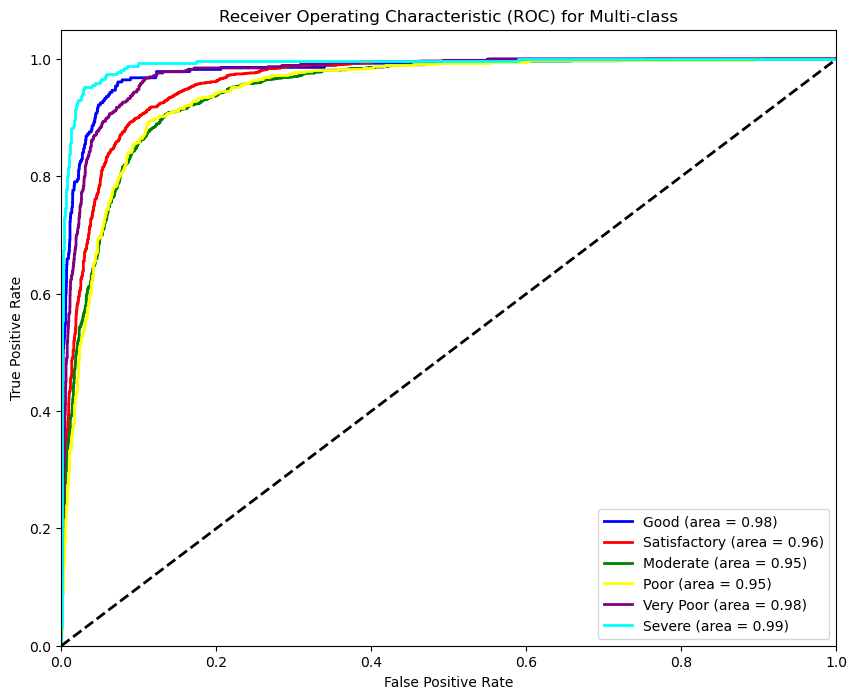

In [205]:
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             balanced_accuracy_score, average_precision_score, f1_score, log_loss,
                             precision_score, recall_score, roc_auc_score, cohen_kappa_score, roc_curve, auc)
import matplotlib.pyplot as plt

# Define y_proba_ovr before using it
y_proba_ovr = xgb_model.predict_proba(X_test)

print('Training score: {}'.format(xgb_model.score(X_train, y_train)))
print('Test score: {}'.format(xgb_model.score(X_test, y_test)))

# Now, compute the metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred)}')
y_test_bin = pd.get_dummies(y_test)
print(f'Average Precision: {average_precision_score(y_test_bin, y_proba_ovr)}')  # Multi-class classification

print(f'F1 Score (Micro): {f1_score(y_test, y_pred, average="micro")}')
print(f'F1 Score (Macro): {f1_score(y_test, y_pred, average="macro")}')
print(f'F1 Score (Weighted): {f1_score(y_test, y_pred, average="weighted")}')
print(f'Precision: {precision_score(y_test, y_pred, average="weighted")}')
print(f'Recall: {recall_score(y_test, y_pred, average="weighted")}')
print(f"Cohen's Kappa: {cohen_kappa_score(y_test, y_pred)}")

print('Classification Report:')
print(classification_report(y_test, y_pred))

# ROC Curve for multi-class using one-vs-rest approach
categories_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
n_classes = len(categories_order)
y_test_bin = pd.get_dummies(y_test)
y_proba_ovr = xgb_model.predict_proba(X_test)

fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin.iloc[:, i], y_proba_ovr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'yellow', 'purple', 'cyan']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='{0} (area = {1:0.2f})'.format(categories_order[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Multi-class')
plt.legend(loc="lower right")
plt.show()

WITH OVERSAMPLING

In [82]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, cohen_kappa_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Read the datasets from the CSV files
x_train = pd.read_csv("data_split/X_resampled_train.csv").drop(columns=['Encoded_City'])
y_train = pd.read_csv('data_split/y_resampled_train.csv').iloc[:, 0]

x_valid = pd.read_csv('data_split/X_val.csv').drop(columns=['Encoded_City'])
y_valid = pd.read_csv('data_split/y_val.csv').iloc[:, 0]


x_test = pd.read_csv('data_split/X_test.csv').drop(columns=['Encoded_City'])
y_test = pd.read_csv('data_split/y_test.csv').iloc[:, 0]

In [101]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, cohen_kappa_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import joblib


# Train the XGBClassifier model
model = xgb.XGBClassifier(objective="softmax", num_class=6,n_estimators=4000, eta=0.01,subsample=0.6, colsample_bytree=0.6)  # Adjust the number of classes accordingly
model.fit(x_train, y_train)

# Make predictions on the training and validation sets
y_train_pred = model.predict(x_train)
y_valid_pred = model.predict(x_valid)

# Calculate evaluation metrics for the training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)

precision = precision_score(y_valid, y_valid_pred, average='weighted')
recall = recall_score(y_valid, y_valid_pred, average='weighted')
f1 = f1_score(y_valid, y_valid_pred, average='weighted')
kappa = cohen_kappa_score(y_valid, y_valid_pred)
classification_rep = classification_report(y_valid, y_valid_pred)

# Plot ROC curve
y_valid_pred_proba = model.predict_proba(x_valid)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(model.n_classes_):
    fpr[i], tpr[i], _ = roc_curve(y_valid, y_valid_pred_proba[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown'] 
for i, color in zip(range(model.n_classes_), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Create and display confusion matrix
cm = confusion_matrix(y_valid, y_valid_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print evaluation metrics
print(f'Training Accuracy: {train_accuracy}')
print(f'Validation Accuracy: {valid_accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Cohen\'s Kappa Score: {kappa}')
print(f'Classification Report:\n{classification_rep}')

# Save the model
joblib.dump(model, 'xgb_model.pkl')

# Test the accuracy on the test set
y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

